<link rel="stylesheet" href="https://use.typekit.net/dvn1law.css">
<style>        
@font-face {
font-family:"futura-pt-bold";
src:url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/l?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff2"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/d?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/a?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("opentype");
font-display:auto;font-style:normal;font-weight:700;font-stretch:normal;
}
</style>
<div style="display: flex; margin: 0px; padding-top: 1.5rem; padding-bottom: 1.5rem; font-family: futura-pt, 'Tahoma', 'Segoe UI', Geneva, Verdana, sans-serif;">
    <span style="margin-right: 15px; padding-right: 2rem; background-color: #3b6d48;"></span>
    <div style="margin-bottom: auto; margin-top: auto; margin-right: auto; padding-right: 15px;">
        <div style="margin: 0; padding-top: 0.2rem; padding-bottom: 3.3rem; letter-spacing: 0.15rem; color: #a6ce37; font-weight: bold; font-size: 3rem; font: futura-pt-bold"> CEOS Analytics Lab</div>
        <div style="margin: 0; color: #469ab9; font-weight: bold; font-size: 1.5rem;">Welcome to the CEOS Analytics Lab!</div>
        <div style="margin: 0; padding-bottom: 0.2rem; color: #474c38; font-size: 1.25rem;"><span>TBD</span><span>| </span><span style="color: #3b6d48; font-weight: bold;">Copernicus 30 M</span></div>
        <hr style="border: 1px solid #474c38;">
    </div>
    <div style="margin-top: auto; margin-bottom: auto; margin-left: auto; padding-left: 15px;">
        <div><img style="vertical-align: middle; padding: 0.5rem; width: 300px; height: auto;" src="https://ceos.org/document_management/Communications/CEOS-Logos/CEOS_logo_colour_no_text-small.png" /></div>
    </div>
</div>

# Coprenicus 30 M

The Copernicus DEM is a Digital Surface Model (DSM) that represents the surface of the Earth including buildings, infrastructure and vegetation.
The Copernicus DEM is provided in 3 different instances: EEA-10, GLO-30 and GLO-90. Data were acquired through the TanDEM-X mission between 2011 and 2015. The datasets were made available for use in 2019 and will be maintained until 2026.

### Load

In [32]:
import datacube
dc = datacube.Datacube()
elevation_product = dc.load(product = "copernicus_dem_30",
                            latitude = (38.548753001327486,38.9436066820476),
                            longitude = (-105.1876333892455,-104.80922949443884),
                            output_crs = "EPSG:4326",
                            resolution = [30.0 / 111320.0,30.0 / 111320.0])

### Display

In [27]:
product = elevation_product.isel(time = 0)

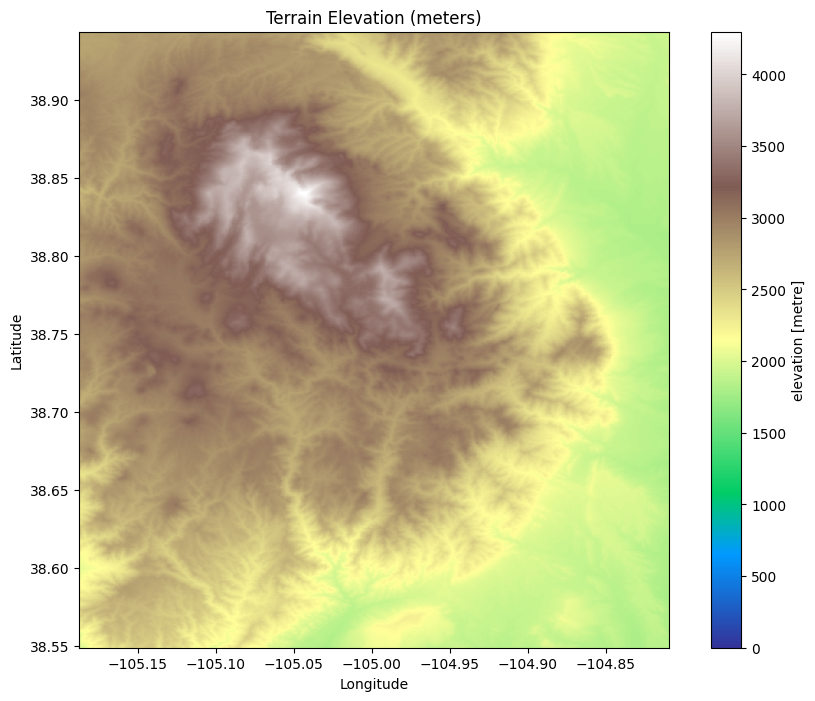

In [28]:
import matplotlib.pyplot as plt
import numpy as np 

product.elevation.plot.imshow(size=8,cmap=plt.cm.terrain,vmin=0.0,vmax=np.max(product.elevation))
plt.gca().set_aspect('equal')
plt.title('Terrain Elevation (meters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
def slope_pct(dem, resolution):
    # Kernel for rate of elevation change in x-axis.
    dx_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
    # Kernel for rate of elevation change in y-axis.
    dy_kernel = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])
    # Rate of change calculations for each axis.
    dx = convolve(dem, dx_kernel) / (8 * resolution)
    dy = convolve(dem, dy_kernel) / (8 * resolution)
    # Return rise/run * 100 for slope percent.
    return np.sqrt(np.square(dx) + np.square(dy)) * 100

In [ ]:
data_slope = xr.DataArray(slope_pct(data_elevation,30.0),coords=dict(data_elevation.coords))

In [ ]:
# Create a combined dataset that includes elevation and slope
Combined_Data = xr.Dataset({'elevation':data_elevation,'slope':data_slope},coords=data_elevation.coords)

In [ ]:
Clipped_Data = Combined_Data.sel(x=slice(min_lon,max_lon),y=slice(max_lat,min_lat))